In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,12)

In [17]:
rain = pd.read_csv('sydney-rain.csv')
rain.rename(columns = {'Monthly Precipitation Total (millimetres)': 'mm'}, inplace=True)

In [18]:
# load temperature data
temperature = pd.read_csv('sydney-temperature.csv')
temperature.rename(columns = {'Mean maximum temperature (°C)': 'C'}, inplace=True)

In [19]:
# make a datetime column.
def calc_period(row):
    return "{year}/{month:0>2}/01".format(year=row['Year'], month=row['Month'])

rain['date'] = rain.apply(calc_period, axis=1)
rain['date'] = pd.to_datetime(rain['date'])
temperature['date'] = temperature.apply(calc_period, axis=1)
temperature['date'] = pd.to_datetime(temperature['date'])

In [20]:
# rain trendline.
x = mdates.date2num(rain['date'])
d = np.polyfit(x, rain['mm'], 1)
f = np.poly1d(d)
rain.insert(7, 'trend', f(x))

# temperature trendline.
tx = mdates.date2num(temperature['date'])
td = np.polyfit(tx, temperature['C'], 1)
tf = np.poly1d(td)
temperature.insert(7, 'trend', tf(tx))

In [21]:
temperature

,Product code,Bureau of Meteorology station number,Year,Month,C,Quality,date,trend
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,21.395237
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,21.397203
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,21.399235
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,21.401201
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,21.403233
...,...,...,...,...,...,...,...,...
991,IDCJAC0002,66037,2021,11,22.6,Y,2021-11-01,23.372283
992,IDCJAC0002,66037,2021,12,25.6,Y,2021-12-01,23.374249
993,IDCJAC0002,66037,2022,1,27.5,Y,2022-01-01,23.376281
994,IDCJAC0002,66037,2022,2,26.8,Y,2022-02-01,23.378312


Text(0.5, 1.0, 'Monthy precipitation and mean maximum temperature in Sydney')

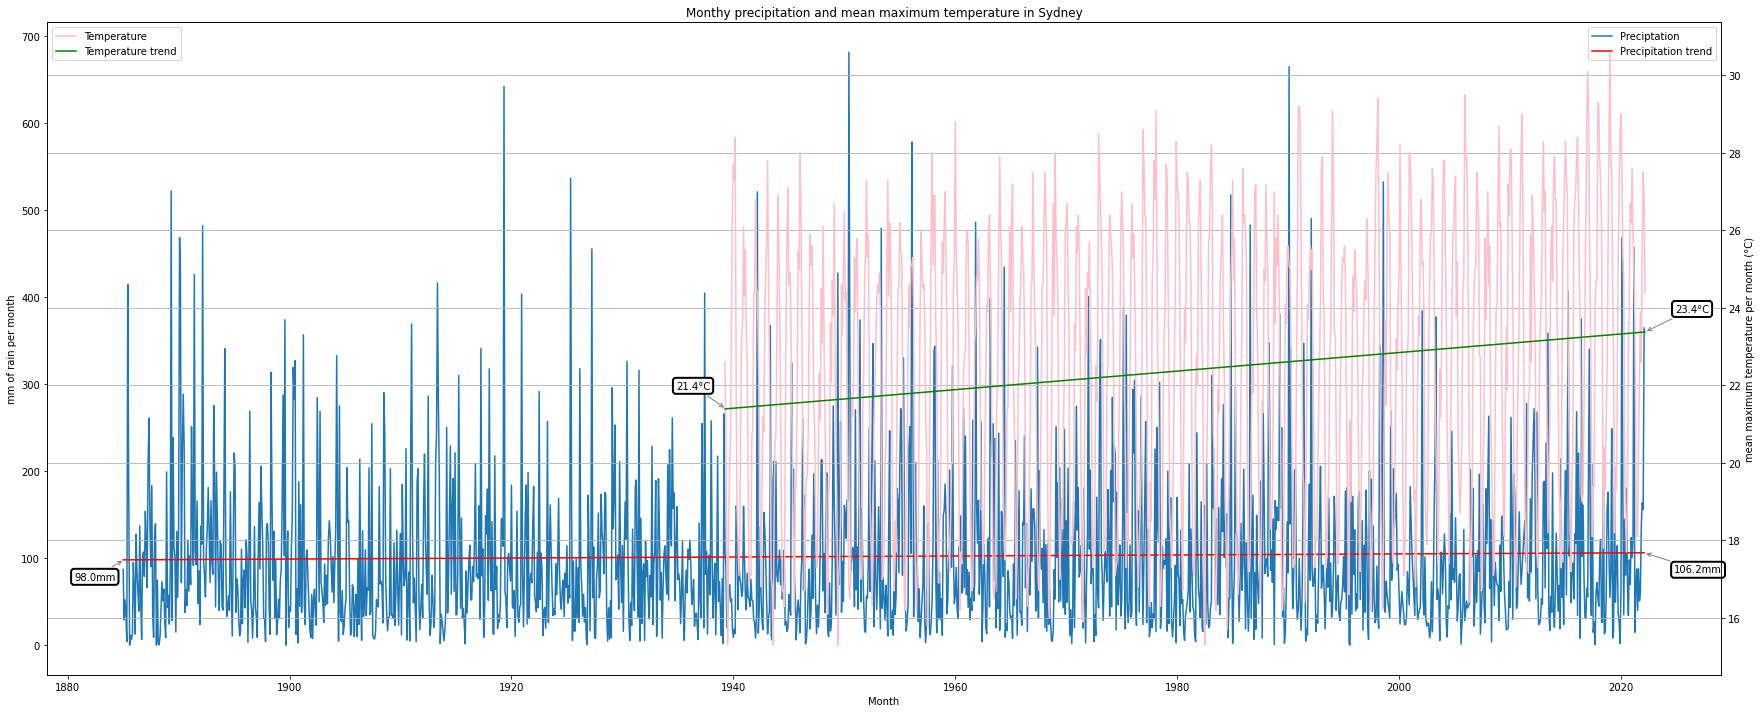

In [87]:
fig, ax = plt.subplots()

# rain plot.
p1 = ax.plot(
    rain['date'], rain['mm'], label='Preciptation'
)
p2 = ax.plot(
    rain['date'], rain['trend'], color='Red', label='Precipitation trend'
)

# temperature plot.
ax2 = ax.twinx()
p3 = ax2.plot(temperature['date'], temperature['C'], color='Pink', label='Temperature')
p4 = ax2.plot(temperature['date'], temperature['trend'], color='Green', label='Temperature trend')

# tickes and grid.
plt.xticks(rotation=90)
plt.grid()

# add annotation for trend line.
box_style = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2)
arrow_style = dict(arrowstyle="->", color="0.5")

# rain
first = rain.iloc[1]
first_label = f"{first['trend']:.1f}mm"
last = rain.iloc[-1]
last_label = f"{last['trend']:.1f}mm"
ax.annotate(
    first_label,
    xy=(first['date'], first['trend']),
    xytext=(-50, -20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)
ax.annotate(
    last_label,
    xy=(last['date'], last['trend']),
    xytext=(30, -20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)
ax.set_ylabel("mm of rain per month")

# temperature.
tfirst = temperature.iloc[1]
tfirst_label = f"{tfirst['trend']:.1f}°C"
tlast = temperature.iloc[-1]
tlast_label = f"{tlast['trend']:.1f}°C"
ax2.annotate(
    tfirst_label,
    xy=(tfirst['date'], tfirst['trend']),
    xytext=(-50, 20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)
ax2.annotate(
    tlast_label,
    xy=(tlast['date'], tlast['trend']),
    xytext=(30, 20),
    textcoords='offset points',
    bbox=box_style,
    arrowprops=arrow_style
)
ax2.set_ylabel("mean maximum temperature per month (°C)")

# legends.
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.set_xlabel('Month')
ax.set_title("Monthy precipitation and mean maximum temperature in Sydney")


In [72]:
# load projected temps
p_temp = pd.read_csv('east-cast-temperature-projection.csv', header=1)
p_rain = pd.read_csv('east-cast-rain-projection.csv', header=1)

/tmp/ipykernel_333430/1610566567.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_temp_50 = p_temp.loc[p_temp['percentile'] == '50th'][p_temp['Season'] == 'Annual'][columns]


<AxesSubplot:>

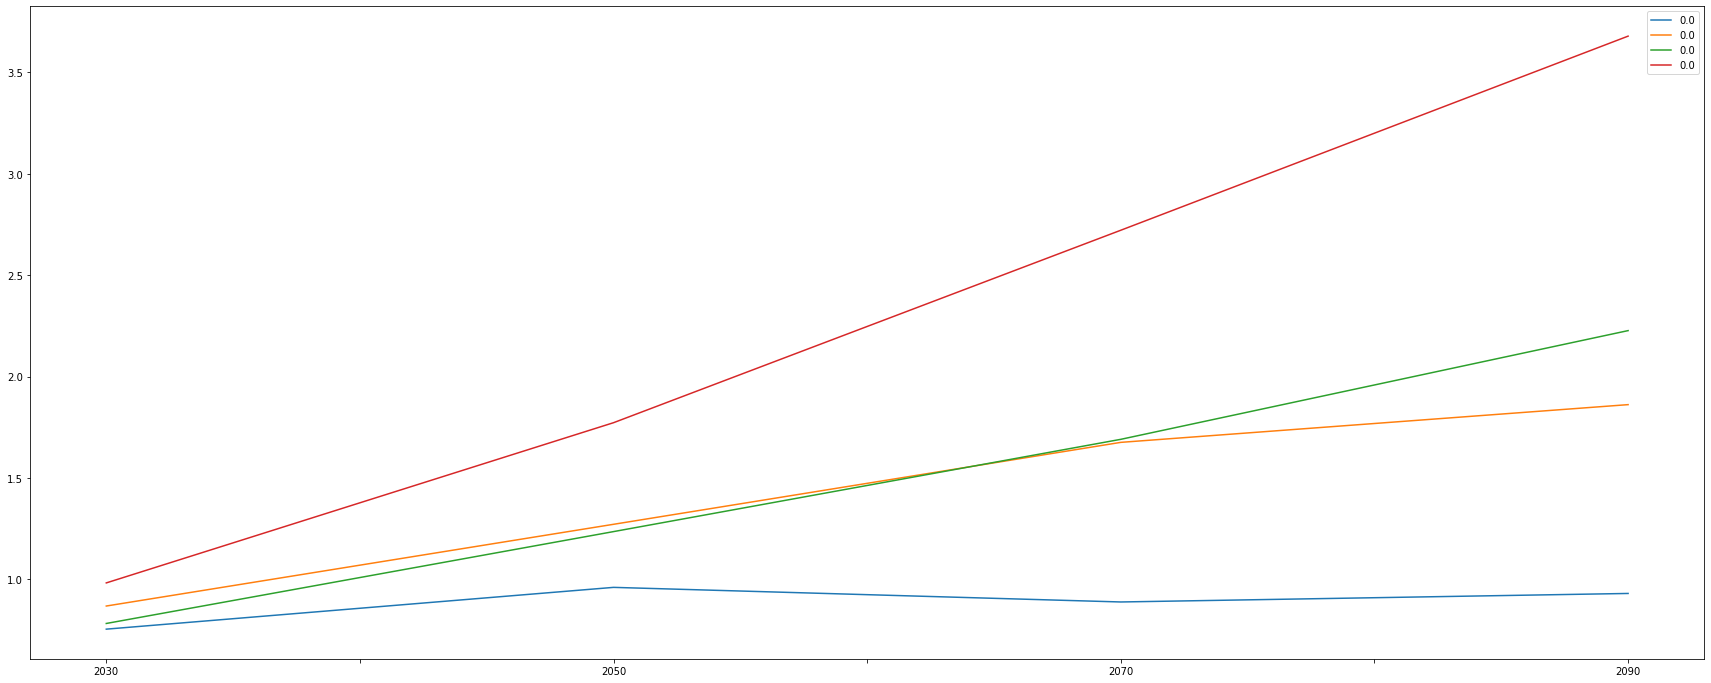

In [73]:
# get annual 50th percentile data.
columns = ['RCP', '2005', '2030', '2050', '2070', '2090']
p_temp_50 = p_temp.loc[p_temp['percentile'] == '50th'][p_temp['Season'] == 'Annual'][columns]
# rotate the data.
p_temp_50 = p_temp_50.T
# update headers.
p_temp_r = p_temp_r.rename(columns=p_temp_r.iloc[0]).drop(p_temp_r.index[0])
p_temp_r.plot()

/tmp/ipykernel_333430/1881652514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_rain_50 = p_rain.loc[p_rain['percentile'] == '50th'][p_rain['Season'] == 'Annual'][columns]


<AxesSubplot:title={'center':'Projected changes to East Coast precipitation'}, xlabel='Year', ylabel='Precipitation change (%)'>

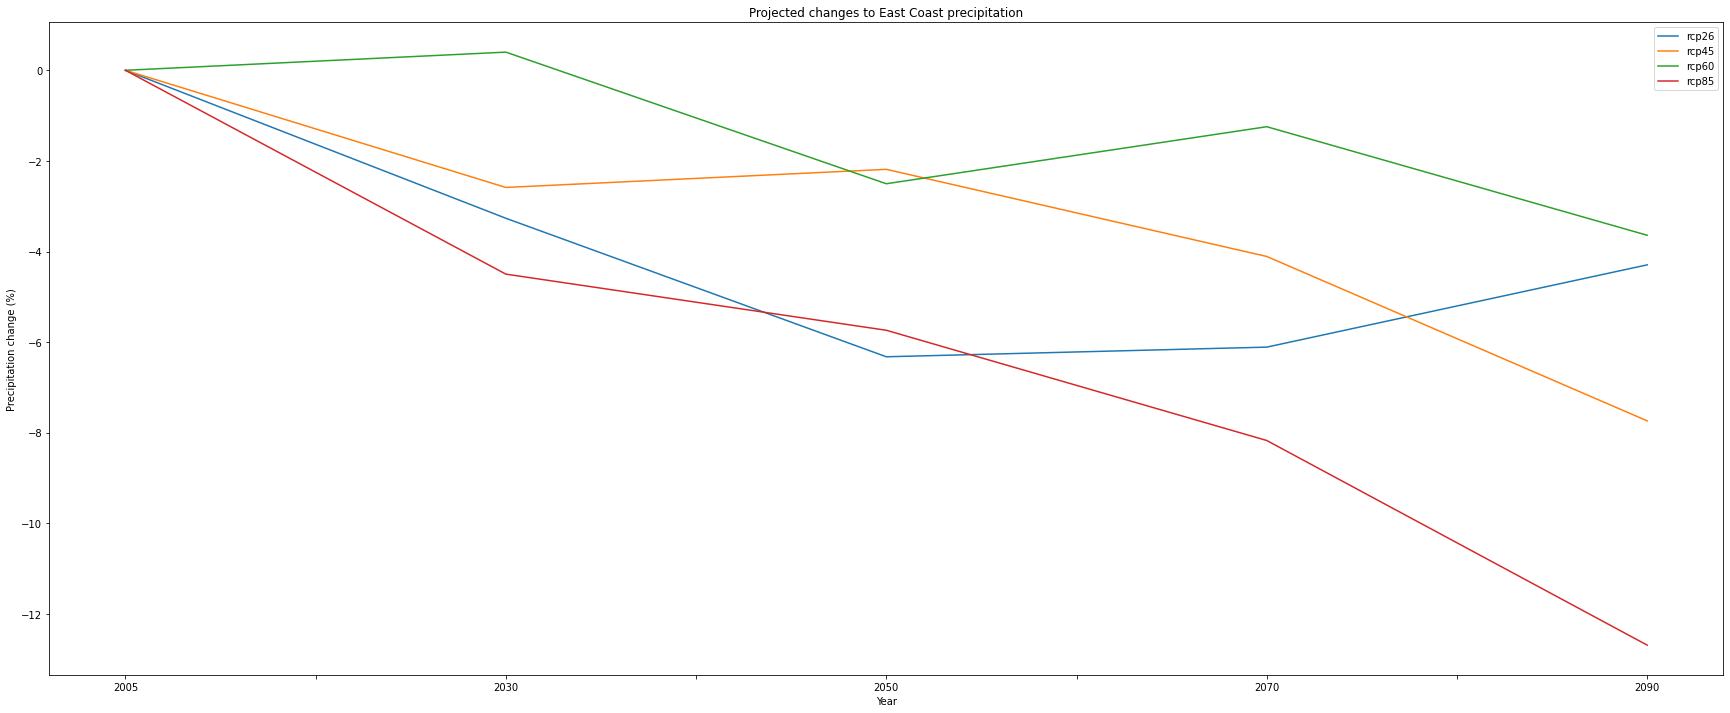

In [90]:
# get annual 50th percentile data.
p_rain_50 = p_rain.loc[p_rain['percentile'] == '50th'][p_rain['Season'] == 'Annual'][columns]
# rotate the data.
p_rain_r = p_rain_50.T
# update headers.
p_rain_r = p_rain_r.rename(columns=p_rain_r.iloc[0]).drop(p_rain_r.index[0])
p_rain_r.plot(xlabel='Year', ylabel='Precipitation change (%)', title='Projected changes to East Coast precipitation')